## Import Libraries and Data

In [2]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('PhD_MasterDataset_OT_Dec2022.csv')
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('MassProfile_011222_run1.csv',t_baseline=25)

## Analyse water addition

In [3]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=3)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=266s and ended at t=674s; mass=49.60674999999997g
This equals a volume of 49.756m; expected was 48.603mL; error is 2.373%


## Analyise surfactants

<IPython.core.display.Javascript object>


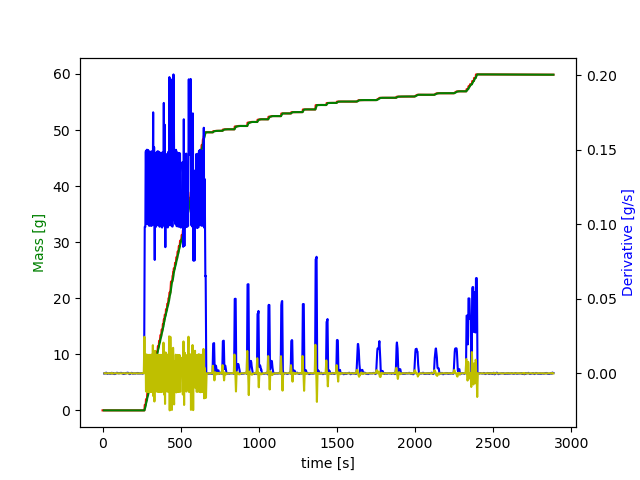

Addition of 0.249g Texapon SB 3 KC detected from 702s to 734s - expected volume = 0.593mL and actual volume = 0.224mL (resulting error is 62.212%)
Addition of 0.266g Texapon SB 3 KC detected from 764s to 794s - expected volume = 0.593mL and actual volume = 0.239mL (resulting error is 59.758%)
Addition of 0.595g Plantapon ACG 50 detected from 840s to 880s - expected volume = 0.634mL and actual volume = 0.524mL (resulting error is 17.347%)
Addition of 0.717g Plantapon ACG 50 detected from 922s to 962s - expected volume = 0.634mL and actual volume = 0.631mL (resulting error is 0.417%)
Addition of 0.48g Plantacare 2000 detected from 986s to 1020s - expected volume = 0.496mL and actual volume = 0.441mL (resulting error is 11.148%)
Addition of 0.571g Plantacare 2000 detected from 1056s to 1094s - expected volume = 0.496mL and actual volume = 0.525mL (resulting error is 5.759%)
Addition of 0.48g Dehyton MC detected from 1138s to 1158s - expected volume = 0.586mL and actual volume = 0.439mL (r

In [4]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=5, specType='surfactant',steps=steps,start_idx=t1,show=True)

## Analyse polyelectrolytes

<IPython.core.display.Javascript object>


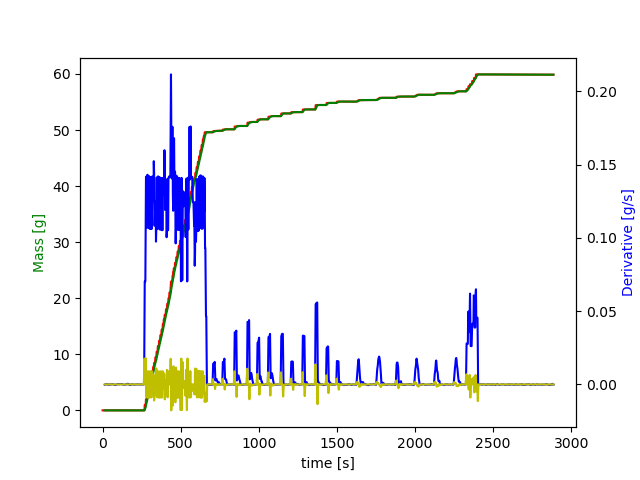

Addition of 0.257g Luviquat Excellence detected from 1624s to 1656s - expected volume = 0.39mL and actual volume = 0.233mL (resulting error is 40.199%)
Addition of 0.401g Luviquat Excellence detected from 1750s to 1788s - expected volume = 0.39mL and actual volume = 0.364mL (resulting error is 6.628%)
Addition of 0.208g Luviquat Excellence detected from 1874s to 1900s - expected volume = 0.413mL and actual volume = 0.187mL (resulting error is 54.783%)
Addition of 0.333g Luviquat Excellence detected from 1906s to 2032s - expected volume = 0.413mL and actual volume = 0.299mL (resulting error is 27.547%)
Addition of 0.279g Luviquat Excellence detected from 2120s to 2162s - expected volume = 0.271mL and actual volume = 0.252mL (resulting error is 7.048%)
Addition of 0.348g Luviquat Excellence detected from 2246s to 2286s - expected volume = 0.271mL and actual volume = 0.315mL (resulting error is 16.048%)


In [5]:
t3 = massProfile.analyseIngredients(avg_window=7, bl_mult=6, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

<IPython.core.display.Javascript object>


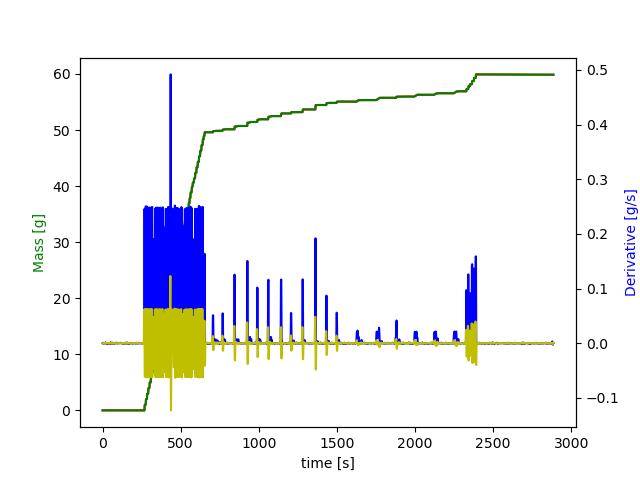

Addition of 0.387g Arlypon TT detected from 2324s to 2336s - expected volume = 0.491mL and actual volume = 0.404mL (resulting error is 17.66%)
Addition of 0.502g Arlypon TT detected from 2336s to 2348s - expected volume = 0.491mL and actual volume = 0.525mL (resulting error is 6.915%)
Addition of 0.367g Arlypon TT detected from 2348s to 2358s - expected volume = 0.455mL and actual volume = 0.38mL (resulting error is 16.591%)
Addition of 0.576g Arlypon TT detected from 2360s to 2372s - expected volume = 0.455mL and actual volume = 0.596mL (resulting error is 31.023%)
Addition of 0.542g Arlypon TT detected from 2372s to 2384s - expected volume = 0.396mL and actual volume = 0.565mL (resulting error is 42.763%)
Addition of 0.638g Arlypon TT detected from 2384s to 2396s - expected volume = 0.396mL and actual volume = 0.664mL (resulting error is 67.895%)


In [6]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=7, mergeSens=2, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [7]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('results.csv', index=False)
actualMassFractions

,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
0,43.0,0.026454,0.000000,0.0,0.0,0.050893,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.027276,0.0,0.0,0.0,0.0,0.041050
1,44.0,0.027116,0.000000,0.0,0.0,0.058306,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.040991,0.0,0.0,0.0,0.0,0.051302
2,45.0,0.000000,0.000000,0.0,0.0,0.000000,0.051706,0.0,0.0,0.0,0.000000,0.0,0.039994,0.022411,0.0,0.0,0.0,0.0,0.039542
3,46.0,0.000000,0.000000,0.0,0.0,0.000000,0.023745,0.0,0.0,0.0,0.000000,0.0,0.026346,0.036120,0.0,0.0,0.0,0.0,0.062478
4,47.0,0.000000,0.057501,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045210,0.0,0.000000,0.026944,0.0,0.0,0.0,0.0,0.052418
5,48.0,0.000000,0.065375,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.072879,0.0,0.000000,0.031743,0.0,0.0,0.0,0.0,0.058172
